### 분류
#### 알고리즘
- 나이브 베이즈 (Naive Bayes)
- 로지스틱 회귀 (Logistic Regression)
- 결정 트리 (Decision Tree)
- 서포트 벡터 머신 (Support Vector Machine)
- 최소 근접 알고리즘 (Nearest Neighbor Algoritm)
- 심층 연결 기반의 신경망 (Neural Network)
- 서로 다른 머신 러닝 알고리즘을 결합 (Ensemble)


- 앙상블은 서로 다른/또는 같은 알고리즘을 단순히 결합한 형태도 있으나, 일반적으로는 배깅(Bagging)과 부스팅(Boosting)방식으로 나뉜다.
- 랜덤 포레스트(Random Forest)는 배깅 방식의 대표로 뛰어난 예측 성능, 상대적으로 빠른 수행시간, 유연성 등으로 많은 분석가가 애용한다.
- 근래는 부스팅 방식이 인기 많다.
- Gradient Boosting의 경우 뛰어난 예측 성능을 가지고 있다. 하지만 수행시간이 오래걸리는게 단점이다.
- XgBoost, LightGBM 등 기존 Gradient Boosting의 예측 성능을 한 단계 발전시키면서 수행시간을 단축시킨 알고리즘이 등장했다.


- 앙상블 시 과적합을 조심해야 한다.


### 결정 트리
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만든다.
- 트리의 깊이가 깊어질수록 분류 결정 방식이 복잡해진다는 얘기. 과적합으로 이어지기 쉽다.
- 사이킷런에서 구현된 DecisionTreeClassifier는 기본으로 지니계수를 이용해 데이터 세트를 분할한다.
- 특징
        균일도라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적임
        룰이 명확하고 이에 기반해 규칙 노드와 리프노드가 만들어 짐을 알 수 있고 시각화로 표현도 가능하다.
        정보의 균일도만 신경쓰면돼서 특별한 경우를 제외하고 피처의 스케일링같은 전처리작업이 필요없다.
        최대의 단점은 과적합
        
        

### 결정 트리 과적합

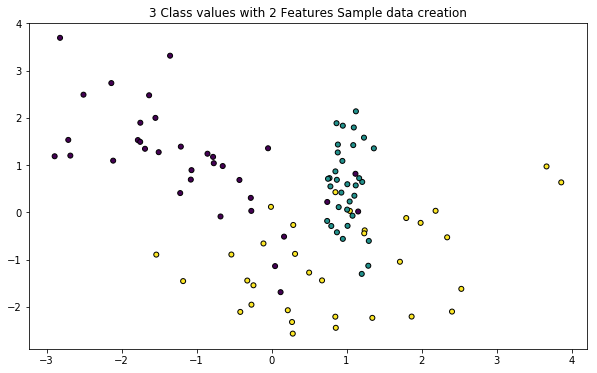

In [6]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시각화를 위해 피처는 2개 클래스는 3개
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화

plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')
plt.show()

In [7]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

/home/jeongmyeong/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


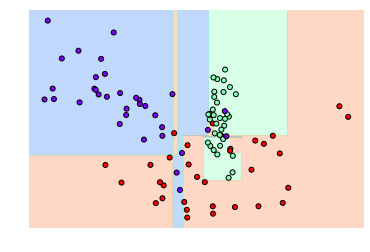

In [8]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- 이상치 데이터까지 분류하기 위해 분할이 자주 일어나 결정 기준 경계가 많다.

/home/jeongmyeong/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


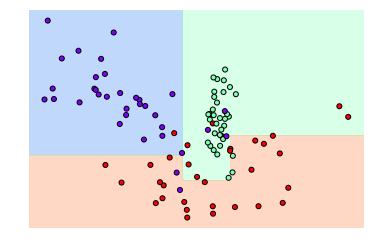

In [9]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- 이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류 됐다.